# Arash SC create a project for head position



This notebook demonstrates the necessary steps to use python and DeepLabCut for creating and analysins videos from orientation 
experiment 

This notebook illustrates how to:
 
- make a movie from images 
- create a project
- extract training frames
- label the frames
- plot the labeled images (optional)
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video (optional)
- Go to Matlab 



## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut
## https://github.com/AlexEMG/DeepLabCut

In [3]:
task='ar21_07_06_20LR_R' # Enter the name of your experiment Task
task='Topview3435' 

experimenter='Arash' # Enter the name of the experimenter
Mainfolder =  'D:\\videos\\AR19distance\\2020_09_14_ 215321'; # Enter the name of the folder with images folders inside 
Mainfolder = 'F:\\ar343rdday\\2021_07_16\\';
filenames = ['154.avi','98.avi','57.avi']; # Enter the name of the files you want to train
video = [str(Mainfolder)+str(f) for f in filenames]; # add path to each file
Mainfolder2 = 'F:\\ar353rdday\\2021_07_16\\';
filenames2 = ['7.avi','33.avi','38.avi']; # Enter the name of the files you want to train
video2 = [str(Mainfolder2)+str(f) for f in filenames2]; # add path to each file
video = video+video2
Mainfolder3 = 'F:\\ar30motor\\2021_07_09\\';
filenames2 = ['113.avi','123.avi']; # Enter the name of the files you want to train
video2 = [str(Mainfolder3)+str(f) for f in filenames2]; # add path to each file
video = video+video2
Mainfolder4 = 'F:\\ar32motor\\2021_07_09\\';
filenames2 = ['88.avi','89.avi']; # Enter the name of the files you want to train
video2 = [str(Mainfolder4)+str(f) for f in filenames2]; # add path to each file
video = video+video2


print(video)
#deeplabcut.create_new_project(task,experimenter,video, working_directory=Mainfolder,copy_videos=False) #change the working directory to where you want the folders created.
deeplabcut.create_new_project(task,experimenter, video, working_directory='F:\\DLC',copy_videos=True, multianimal=False)
#deeplabcut.create_new_project(task,experimenter, video,copy_videos=True)

['F:\\ar343rdday\\2021_07_16\\154.avi', 'F:\\ar343rdday\\2021_07_16\\98.avi', 'F:\\ar343rdday\\2021_07_16\\57.avi', 'F:\\ar353rdday\\2021_07_16\\7.avi', 'F:\\ar353rdday\\2021_07_16\\33.avi', 'F:\\ar353rdday\\2021_07_16\\38.avi', 'F:\\ar30motor\\2021_07_09\\113.avi', 'F:\\ar30motor\\2021_07_09\\123.avi', 'F:\\ar32motor\\2021_07_09\\88.avi', 'F:\\ar32motor\\2021_07_09\\89.avi']
Created "F:\DLC\Topview3435-Arash-2021-07-28\videos"
Created "F:\DLC\Topview3435-Arash-2021-07-28\labeled-data"
Created "F:\DLC\Topview3435-Arash-2021-07-28\training-datasets"
Created "F:\DLC\Topview3435-Arash-2021-07-28\dlc-models"
Copying the videos
F:\DLC\Topview3435-Arash-2021-07-28\videos\154.avi
F:\DLC\Topview3435-Arash-2021-07-28\videos\98.avi
F:\DLC\Topview3435-Arash-2021-07-28\videos\57.avi
F:\DLC\Topview3435-Arash-2021-07-28\videos\7.avi
F:\DLC\Topview3435-Arash-2021-07-28\videos\33.avi
F:\DLC\Topview3435-Arash-2021-07-28\videos\38.avi
F:\DLC\Topview3435-Arash-2021-07-28\videos\113.avi
F:\DLC\Topview3435

'F:\\DLC\\Topview3435-Arash-2021-07-28\\config.yaml'

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [2]:
%matplotlib inline
path_config_file = 'D:\\Dropbox\\Notebook\\ar19_09_15_20Face2-Arash-2020-09-15\\config.yaml';
path_config_file = 'D:\\Dropbox\\Notebook\\ar32_10_09_20Face3-Arash-2020-10-10\\config.yaml';
path_config_file = 'D:\\Dropbox\\Notebook\\ar30_10_10_14spouts-Arash-2020-10-24\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\ar32_10_11_12-Arash-2020-11-14\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\ar302_10_11_14-Arash-2020-11-16\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\ar32_10_11_24-Arash-2020-11-25\\config.yaml';
path_config_file = 'D:\\Sidevideos\\DLC\\Sideview4-Arash-2021-07-18\\config.yaml'
path_config_file = 'F:\\DLC\\Topview3435-Arash-2021-07-28\\config.yaml';

#Enter the path of the config file that was just created from the above step (check the folder)
deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=True, checkcropping=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#You can change the cropping to false, then delete the checkcropping part!

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\154.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\98.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\57.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\7.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\33.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\38.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\113.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: F:\DLC\Topview3435-Arash-2021-07-28\videos\12

## define the config path and load deeplabcut


In [3]:
# write the Path config file path
path_config_file = 'E:\\movies\\ar2breathing\\10_08_19\\ar2breathing_10_08_19LR_R-Arash-2020-04-30\\config.yaml';
path_config_file = 'D:\\videos\\ar21\\2020-07-06\\ar21_07_06_20Face2-Arash-2020-07-07\\config.yaml';
path_config_file = 'D:\\Dropbox\\Notebook\\ar19_09_15_20Face3-Arash-2020-09-16\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\2020_10_09\\ar32_10_09_20Face3-Arash-2020-10-10\\config.yaml';
path_config_file = 'D:\\notebook\\ar30_10_10_14spouts-Arash-2020-10-24\\config.yaml';
path_config_file = 'D:\\videos\\ar30\\ar30_10_11_04-Arash-2020-11-05\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\ar32_10_11_12-Arash-2020-11-14\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\ar302_10_11_14-Arash-2020-11-16\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\ar32_10_11_24-Arash-2020-11-25\\config.yaml';
path_config_file = 'D:\\videos\\ar32\\ar32_10_11_24-Arash-2020-11-25\\config.yaml';
path_config_file = 'D:\\Dropbox\\Notebook\\Sideview4-Arash-2021-07-18\\config.yaml'
path_config_file = 'D:\\Sidevideos\\DLC\\Sideview4-Arash-2021-07-18\\config.yaml'



## add videos from other folders and rats

In [ ]:
Mainfolder =  'D:\\videos\\ar21\\2020_07_08\\'; # Enter the name of the folder with images folders inside 
filenames = ['20L.avi','21L.avi']; # Enter the name of the files you want to train
#filenames = ['6L.avi']; # Enter the name of the files you want to train
video = [str(Mainfolder)+str(f) for f in filenames]; # add path to each file
Mainfolder2 = 'D:\\videos\\ar30\\2020_11_18\\';
filenames2 = ['217.avi','218.avi']; # Enter the name of the files you want to train
video2 = [str(Mainfolder2)+str(f) for f in filenames2]; # add path to each file
video = video+video2
deeplabcut.add_new_videos(path_config_file, video2, copy_videos=True)

## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [ ]:
%gui wx

deeplabcut.label_frames(path_config_file)

wxAssertionError: C++ assertion "IsValid(N)" failed at ..\..\src\msw\radiobox.cpp(417) in wxRadioBox::SetSelection(): invalid radiobox index

**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [3]:

deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by Arash.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00,  9.54it/s]


If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


## add_new_videos

In [ ]:
Mainfolder =  'D:\\videos\\ar32\\2020_11_12\\'; # Enter the name of the folder with images folders inside 
filenames = ['158.avi','160.avi']; # Enter the name of the files you want to train
#filenames = ['6L.avi']; # Enter the name of the files you want to train
video = [str(Mainfolder)+str(f) for f in filenames]; # add path to each file
deeplabcut.add_new_videos(path_config_file, video, copy_videos=True)

## Reminder: Build your skeleton connections before you create a training set!


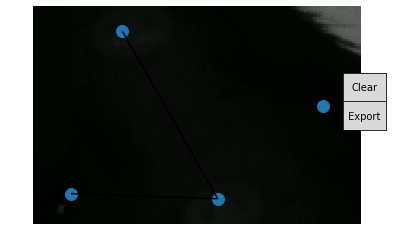

In [6]:
deeplabcut.SkeletonBuilder(path_config_file)

If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

In [7]:
deeplabcut.create_training_model_comparison(path_config_file, num_shuffles=1, net_types=['resnet_50'], augmenter_types=['default', 'imgaug'] )


F:\DLC\Topview3435-Arash-2021-07-28\training-datasets\iteration-0\UnaugmentedDataSet_Topview3435Jul28  already exists!
You passed a split with the following fraction: 95%
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!
F:\DLC\Topview3435-Arash-2021-07-28\training-datasets\iteration-0\UnaugmentedDataSet_Topview3435Jul28  already exists!
You passed a split with the following fraction: 95%
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Start training  
### If yu want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [8]:
deeplabcut.train_network(path_config_file,shuffle=1,displayiters=1000,saveiters=1000)

Selecting single-animal trainer


Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Nose', 'Snout', 'Leye', 'Reye'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_Topview3435Jul28\\Topview3435_Arash95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Tennessee\\Anaconda3\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_Topview3435Jul28\\Documentation_data-To

Starting with imgaug pose-dataset loader.
Batch Size is 1
Initializing ResNet
Loading ImageNet-pretrained resnet_50
Display_iters overwritten as 1000
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'F:\\DLC\\Topview3435-Arash-2021-07-28\\dlc-models\\iteration-0\\Topview3435Jul28-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'weigh_only_present_joints': False, 'pairwise_huber_loss': False, 'partaffinityfield_predict': Fa

iteration: 1000 loss: 0.0236 lr: 0.005
iteration: 2000 loss: 0.0126 lr: 0.005
iteration: 3000 loss: 0.0106 lr: 0.005
iteration: 4000 loss: 0.0093 lr: 0.005
iteration: 5000 loss: 0.0088 lr: 0.005
iteration: 6000 loss: 0.0082 lr: 0.005
iteration: 7000 loss: 0.0076 lr: 0.005
iteration: 8000 loss: 0.0072 lr: 0.005
iteration: 9000 loss: 0.0069 lr: 0.005
iteration: 10000 loss: 0.0065 lr: 0.005
iteration: 11000 loss: 0.0092 lr: 0.02
iteration: 12000 loss: 0.0075 lr: 0.02
iteration: 13000 loss: 0.0070 lr: 0.02
iteration: 14000 loss: 0.0064 lr: 0.02
iteration: 15000 loss: 0.0061 lr: 0.02
iteration: 16000 loss: 0.0057 lr: 0.02
iteration: 17000 loss: 0.0055 lr: 0.02
iteration: 18000 loss: 0.0054 lr: 0.02
iteration: 19000 loss: 0.0050 lr: 0.02
iteration: 20000 loss: 0.0050 lr: 0.02
iteration: 21000 loss: 0.0049 lr: 0.02
iteration: 22000 loss: 0.0047 lr: 0.02
iteration: 23000 loss: 0.0047 lr: 0.02
iteration: 24000 loss: 0.0046 lr: 0.02
iteration: 25000 loss: 0.0044 lr: 0.02
iteration: 26000 loss: 0

KeyboardInterrupt: 

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [9]:
deeplabcut.evaluate_network(path_config_file,Shuffles=[1], plotting=False)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Nose', 'Snout', 'Leye', 'Reye'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_Topview3435Jul28\\Topview3435_Arash95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Tennessee\\Anaconda3\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_Topview3435Jul28\\Documentation_data-To

Running  DLC_resnet50_Topview3435Jul28shuffle1_110000  with # of trainingiterations: 110000
Initializing ResNet
Analyzing data...


150it [00:08, 17.14it/s]


Done and results stored for snapshot:  snapshot-110000
Results for 110000  training iterations: 95 1 train error: 2.35 pixels. Test error: 5.25  pixels.
With pcutoff of 0.6  train error: 2.35 pixels. Test error: 5.25 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [10]:

#path_config_file = 'D:\\rat_movies_SC\\ar19muscimol\\10_10_2019\\ar19muscimol10-10-19_LR_R-Arash-2020-02-28\\config.yaml';
#path_config_file = 'D:\\rat_movies_SC\\ar19muscimol\\10_10_2019\\ar19muscimol10-10-19_LR_L-Arash-2020-03-01\\config.yaml';
#path_config_file = 'E:\\movies\\ar2breathing\\10_08_19\\ar2breathing_10_08_19-Arash-2020-03-26\\config.yaml'
#path_config_file = 'E:\\movies\\ar2breathing\\10_08_19\\ar2breathing_10_08_19LR_R-Arash-2020-04-30\\config.yaml'
#path_config_file = 'D:\\videos\\ar21\\2020-07-06\\ar21_07_06_20Face2-Arash-2020-07-07\\config.yaml';
#path_config_file = 'D:\\Dropbox\\Notebook\\ar19_09_15_20Face3-Arash-2020-09-16\\config.yaml';
#path_config_file = 'D:\\Dropbox\\Notebook\\ar19_09_15_20Face3-Arash-2020-09-16\\config.yaml';
#path_config_file = 'D:\\videos\\ar32\\2020_10_09\\ar32_10_09_20Face3-Arash-2020-10-10\\config.yaml';
#path_config_file = 'D:\\videos\\ar30\\ar30_10_11_04-Arash-2020-11-05\\config.yaml';
#path_config_file = 'D:\\videos\\ar32\\ar32_10_11_24-Arash-2020-11-25\\config.yaml';

import os
#path_config_file = 'D:\\notebook\\ar30_10_10_14spouts-Arash-2020-10-24\\config.yaml';
Mainfolder = 'E:\\movies\\ar2breathing\\10_06_19'
Mainfolder = 'D:\\rat_movies_SC\\ar19muscimol\\10_10_2019'
Mainfolder = 'D:\\rat_movies_SC\\ar19tear19salin\\10_08_19'
Mainfolder = 'E:\\movies\\MUSCIMOL\\ar19tear19salin\\10_08_19'
Mainfolder = 'D:\\videos\\ar32\\2020_11_24'
Mainfolder = 'D:\\Sidevideos\\ar30motor\\2021_07_09'
Mainfolder = 'D:\\Sidevideos\\ar343rdday\\2021_07_16'
Mainfolder = 'D:\\Sidevideos\\ar343rdday\\2021_07_16'
Mainfolder = 'F:\\ar353rdday\\2021_07_16\\';


text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('.avi') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]
#text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('R.avi') and not f.endswith('L.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]
#text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]

#text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('.mp4') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]

#path_config_file = 'F:\\ar19muscimol500ug500nlrightside\\10_10_19\\ar19_10102019-Fassihi-2019-11-12\\config.yaml';


#path_config_file = 'D:\\rat_movies_SC\\ar19muscimol\\10_10_2019\\ar19muscimol10-10-19_LR_L-Arash-2020-03-01\\config.yaml'
##text_files = ['']
#text_files = 'E:\\movies\\ar2breathing\\10_08_19\\20-18-27.avi'

print(text_files)
#deeplabcut.analyze_videos(path_config_file,text_files[1:len(text_files)],shuffle=1, save_as_csv=True)
#deeplabcut.analyze_videos(path_config_file,text_files[3],shuffle=1, save_as_csv=True)
deeplabcut.analyze_videos(path_config_file,text_files,shuffle=1, save_as_csv=True)
deeplabcut.filterpredictions(path_config_file,text_files)


['F:\\ar353rdday\\2021_07_16\\0.avi', 'F:\\ar353rdday\\2021_07_16\\1.avi', 'F:\\ar353rdday\\2021_07_16\\10.avi', 'F:\\ar353rdday\\2021_07_16\\100.avi', 'F:\\ar353rdday\\2021_07_16\\101.avi', 'F:\\ar353rdday\\2021_07_16\\102.avi', 'F:\\ar353rdday\\2021_07_16\\103.avi', 'F:\\ar353rdday\\2021_07_16\\104.avi', 'F:\\ar353rdday\\2021_07_16\\105.avi', 'F:\\ar353rdday\\2021_07_16\\106.avi', 'F:\\ar353rdday\\2021_07_16\\107.avi', 'F:\\ar353rdday\\2021_07_16\\108.avi', 'F:\\ar353rdday\\2021_07_16\\109.avi', 'F:\\ar353rdday\\2021_07_16\\11.avi', 'F:\\ar353rdday\\2021_07_16\\110.avi', 'F:\\ar353rdday\\2021_07_16\\111.avi', 'F:\\ar353rdday\\2021_07_16\\112.avi', 'F:\\ar353rdday\\2021_07_16\\113.avi', 'F:\\ar353rdday\\2021_07_16\\114.avi', 'F:\\ar353rdday\\2021_07_16\\115.avi', 'F:\\ar353rdday\\2021_07_16\\116.avi', 'F:\\ar353rdday\\2021_07_16\\117.avi', 'F:\\ar353rdday\\2021_07_16\\118.avi', 'F:\\ar353rdday\\2021_07_16\\119.avi', 'F:\\ar353rdday\\2021_07_16\\12.avi', 'F:\\ar353rdday\\2021_07_16\\12

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Nose', 'Snout', 'Leye', 'Reye'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_Topview3435Jul28\\Topview3435_Arash95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Tennessee\\Anaconda3\\envs\\dlc-windowsGPU\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_Topview3435Jul28\\Documentation_data-To

Using snapshot-110000 for model F:\DLC\Topview3435-Arash-2021-07-28\dlc-models\iteration-0\Topview3435Jul28-trainset95shuffle1
Initializing ResNet
Starting to analyze %  F:\ar353rdday\2021_07_16\0.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\0.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.89it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.88it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\1.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\1.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:21, 23.56it/s]                                                                                               

Detected frames:  500


510it [00:22, 23.04it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\10.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\10.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.62it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.79it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\100.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\100.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.17it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.34it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\101.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\101.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.23it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\102.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\102.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.95it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.55it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\103.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\103.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.96it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.45it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\104.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\104.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.88it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.29it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\105.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\105.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.91it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.32it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\106.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\106.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.64it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.24it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\107.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\107.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.42it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.36it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\108.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\108.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.52it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.74it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\109.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\109.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.62it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\11.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\11.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.53it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\110.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\110.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 23.52it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.72it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\111.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\111.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:22, 22.21it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\112.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\112.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.08it/s]                                                                                               

Detected frames:  500


510it [00:24, 21.12it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\113.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\113.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 20.86it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.27it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\114.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\114.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.25it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.83it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\115.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\115.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 20.52it/s]                                                                                               

Detected frames:  500


510it [00:24, 21.24it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\116.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\116.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:24, 22.15it/s]                                                                                               

Detected frames:  500


510it [00:24, 20.88it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\117.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\117.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.95it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.78it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\118.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\118.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.76it/s]                                                                                               

Detected frames:  500


510it [00:24, 21.19it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\119.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\119.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.33it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.83it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\12.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\12.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.32it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.75it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\120.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\120.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.23it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\121.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\121.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.16it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\122.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\122.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.11it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\123.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\123.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.55it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\124.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\124.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.93it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.53it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\125.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\125.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.77it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\126.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\126.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.79it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\127.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\127.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.40it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.77it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\128.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\128.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.93it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.69it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\129.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\129.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\13.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\13.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.89it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.33it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\130.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\130.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.97it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.37it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\131.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\131.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.30it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.56it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\132.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\132.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.51it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.70it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\133.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\133.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.22it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\134.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\134.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.07it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\135.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\135.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.43it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\136.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\136.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.15it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\137.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\137.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:24, 22.24it/s]                                                                                               

Detected frames:  500


510it [00:24, 20.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\138.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\138.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.18it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\139.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\139.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.03it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.49it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\14.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\14.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.27it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\140.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\140.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.03it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.38it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\141.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\141.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.41it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.56it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\142.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\142.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.54it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.84it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\143.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\143.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.88it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\144.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\144.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.19it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.80it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\145.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\145.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.72it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.67it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\146.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\146.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.04it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.74it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\147.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\147.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.46it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.49it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\148.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\148.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.70it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.84it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\149.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\149.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.29it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.70it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\15.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\15.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:24, 21.01it/s]                                                                                               

Detected frames:  500


510it [00:24, 20.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\150.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\150.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.60it/s]                                                                                               

Detected frames:  500


510it [00:23, 22.03it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\151.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\151.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.40it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.83it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\152.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\152.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.45it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\153.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\153.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.42it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.73it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\154.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\154.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.27it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.65it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\155.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\155.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.93it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\156.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\156.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:24, 22.69it/s]                                                                                               

Detected frames:  500


510it [00:24, 20.92it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\157.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\157.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.99it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\158.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\158.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.22it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.70it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\159.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\159.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.43it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\16.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\16.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.13it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\160.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\160.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.65it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\161.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\161.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.63it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\162.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\162.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.44it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\163.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\163.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.17it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\164.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\164.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.29it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\165.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\165.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.26it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\166.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\166.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.33it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\167.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\167.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.91it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\168.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\168.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.48it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\169.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\169.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.02it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\17.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\17.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.43it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.66it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\170.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\170.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.33it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\171.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\171.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.40it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.78it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\172.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\172.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:24, 20.62it/s]                                                                                               

Detected frames:  500


510it [00:24, 20.85it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\173.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\173.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.67it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.89it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\174.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\174.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.30it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.72it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\175.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\175.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.66it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\176.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\176.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.62it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.55it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\177.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\177.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.39it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.69it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\178.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\178.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\179.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\179.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.74it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\18.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\18.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.30it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.77it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\180.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\180.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.17it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\181.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\181.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.16it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\182.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\182.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.39it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\183.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\183.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.57it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.57it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\184.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\184.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.58it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\185.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\185.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.18it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\186.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\186.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.51it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.48it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\187.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\187.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.21it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.53it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\188.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\188.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.27it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\189.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\189.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.31it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\19.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\19.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.19it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.44it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\190.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\190.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.19it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\191.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\191.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.18it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.47it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\192.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\192.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.55it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\193.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\193.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.57it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\194.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\194.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.29it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\195.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\195.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.22it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.47it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\196.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\196.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.09it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.45it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\197.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\197.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.49it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.79it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\198.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\198.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\199.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\199.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.45it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\2.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\2.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.21it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\20.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\20.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\200.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\200.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.44it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.56it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\201.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\201.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.31it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.69it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\202.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\202.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.46it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.73it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\203.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\203.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.11it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\204.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\204.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.17it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\205.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\205.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.08it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\206.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\206.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.51it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\207.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\207.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\208.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\208.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.02it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\209.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\209.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.42it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\21.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\21.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.59it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.84it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\210.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\210.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.12it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\211.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\211.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.85it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\212.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\212.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.67it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.81it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\213.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\213.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.62it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.82it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\214.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\214.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.78it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\215.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\215.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.67it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\216.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\216.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.05it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\217.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\217.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.21it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.57it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\218.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\218.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.18it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\219.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\219.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.42it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\22.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\22.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.79it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.74it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\220.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\220.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.49it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\221.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\221.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.18it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\222.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\222.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.45it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\223.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\223.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.35it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.55it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\224.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\224.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.53it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\225.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\225.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.38it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.73it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\226.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\226.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.39it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\227.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\227.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.20it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.66it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\228.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\228.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.30it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\229.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\229.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.49it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\23.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\23.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.66it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.89it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\230.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\230.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.51it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.93it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\231.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\231.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.62it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.88it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\232.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\232.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.35it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.79it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\233.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\233.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.67it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.81it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\234.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\234.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.57it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.87it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\235.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\235.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.55it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.87it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\236.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\236.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.51it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.73it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\237.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\237.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.85it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\238.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\238.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.07it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.84it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\239.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\239.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.61it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.91it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\24.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\24.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.65it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.91it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\240.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\240.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.67it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.79it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\241.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\241.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.79it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.86it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\242.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\242.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.85it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\243.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\243.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.45it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.88it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\244.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\244.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.67it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.93it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\245.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\245.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.36it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.87it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\246.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\246.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.54it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.72it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\247.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\247.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.38it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.95it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\248.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\248.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.60it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.80it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\249.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\249.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.53it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.70it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\25.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\25.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.38it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\250.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\250.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.20it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.77it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\251.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\251.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.18it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\252.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\252.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.33it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.74it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\253.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\253.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.43it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\254.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\254.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.24it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\255.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\255.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.48it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.80it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\256.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\256.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.50it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.82it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\257.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\257.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.84it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\258.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\258.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.51it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.97it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\259.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\259.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 20.24it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\26.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\26.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.30it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.65it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\260.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\260.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.67it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.81it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\261.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\261.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.85it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.84it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\262.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\262.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.62it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.93it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\263.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\263.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.52it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.80it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\264.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\264.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.49it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\265.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\265.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.93it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\266.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\266.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.25it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\267.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\267.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.20it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.44it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\268.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\268.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.28it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.42it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\269.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\269.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.06it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\27.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\27.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.10it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\270.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\270.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.03it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.49it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\271.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\271.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.07it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.48it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\272.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\272.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.33it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\273.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\273.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\274.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\274.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.02it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.42it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\275.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\275.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.15it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.53it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\276.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\276.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.48it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.57it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\277.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\277.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.41it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.77it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\278.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\278.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.18it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\279.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\279.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.51it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\28.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\28.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.62it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.65it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\280.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\280.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.30it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\281.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\281.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.00it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\282.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\282.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.05it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\283.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\283.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.57it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\284.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\284.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.60it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\285.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\285.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.22it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\29.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\29.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.31it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.74it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\3.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\3.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.69it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\30.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\30.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.92it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\31.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\31.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.35it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.65it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\32.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\32.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.29it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\33.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\33.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.43it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.73it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\34.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\34.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.26it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\35.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\35.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.21it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\36.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\36.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.27it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\37.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\37.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.40it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.81it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\38.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\38.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.36it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.74it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\39.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\39.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.54it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.70it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\4.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\4.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.32it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\40.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\40.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.23it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.78it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\41.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\41.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.58it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.72it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\42.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\42.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.13it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\43.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\43.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.48it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\44.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\44.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.16it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\45.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\45.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.61it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\46.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\46.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.17it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\47.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\47.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.54it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\48.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\48.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.73it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\49.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\49.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:24, 20.87it/s]                                                                                               

Detected frames:  500


510it [00:24, 20.79it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\5.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\5.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:22, 22.58it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.92it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\50.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\50.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.29it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.73it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\51.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\51.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.06it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.55it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\52.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\52.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.24it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\53.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\53.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.12it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\54.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\54.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.46it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\55.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\55.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.94it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.47it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\56.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\56.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.40it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.50it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\57.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\57.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.07it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.46it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\58.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\58.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.45it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.46it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\59.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\59.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.31it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\6.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\6.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.38it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.56it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\60.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\60.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.22it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.49it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\61.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\61.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.15it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\62.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\62.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.31it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.68it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\63.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\63.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.57it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\64.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\64.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.19it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\65.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\65.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.14it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\66.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\66.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.25it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.49it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\67.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\67.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.24it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\68.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\68.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.25it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\69.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\69.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.42it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.49it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\7.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\7.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.37it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.57it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\70.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\70.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.52it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\71.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\71.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.05it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.43it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\72.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\72.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.13it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\73.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\73.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.10it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.54it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\74.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\74.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.69it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.32it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\75.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\75.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.39it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.78it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\76.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\76.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.25it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\77.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\77.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.49it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.60it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\78.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\78.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.23it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.66it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\79.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\79.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.11it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.58it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\8.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\8.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.21it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\80.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\80.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.34it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.56it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\81.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\81.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.36it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.65it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\82.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\82.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.42it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.66it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\83.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\83.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.74it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.66it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\84.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\84.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.53it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.77it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\85.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\85.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.31it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.55it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\86.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\86.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.48it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.62it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\87.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\87.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.32it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.63it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\88.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\88.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.35it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.57it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\89.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\89.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.50it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.59it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\9.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\9.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.47it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.64it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\90.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\90.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.13it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\91.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\91.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.36it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.70it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\92.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\92.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.26it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.65it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\93.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\93.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.44it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\94.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\94.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.27it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.69it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\95.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\95.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.39it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.55it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\96.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\96.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 21.85it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.53it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\97.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\97.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.08it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.61it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\98.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\98.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.38it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.71it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
Starting to analyze %  F:\ar353rdday\2021_07_16\99.avi
F:\ar353rdday\2021_07_16  already exists!
Loading  F:\ar353rdday\2021_07_16\99.avi
Duration of video [s]:  12.5 , recorded with  40.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  1440 484
Starting to extract posture


510it [00:23, 22.09it/s]                                                                                               

Detected frames:  500


510it [00:23, 21.51it/s]


Saving results in F:\ar353rdday\2021_07_16...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Filtering with median model F:\ar353rdday\2021_07_16\0.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\1.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\10.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\100.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\101.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\102.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\103.avi
Saving filtered csv poses!
Filtering with me

Filtering with median model F:\ar353rdday\2021_07_16\262.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\263.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\264.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\265.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\266.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\267.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\268.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\269.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\27.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\270.avi
Saving filtered csv poses!
Filtering with median model F:\ar353rdday\2021_07_16\271.avi
Saving filtered csv poses!
Filtering with median model F:\ar

## Track non tracked files


In [ ]:
# Track non tracked files 
import os
path_config_file = 'F:\\ar2breathing\\10_06_19\\ar2_10062019_ii-Fassihi-2019-10-07\\config.yaml';

Mainfolder = 'Y:\\movies_Rat_SC_project\\ar2breathing\\10_06_19'
text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('.avi') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('breathing.avi')]
text_files2 = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('L.avi') ]
#print(text_files)
#%whos

text_files3 = [f.replace("L.", ".") for f in text_files2 ]
one_not_two = set(text_files) - set(text_files3)
one_not_two = 'Y:\\movies_Rat_SC_project\\ar2breathing\\10_06_19\\22-25-05.avi'
print(one_not_two)
deeplabcut.analyze_videos(path_config_file,one_not_two,shuffle=1, save_as_csv=True)

# Track Tracklets and then filter for multiple animals (maybe whiskers)

In [ ]:
Mainfolder = 'D:\\videos\\ar21\\2020_07_08\\'
import os

text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('.avi') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]
print(text_files)
deeplabcut.convert_detections2tracklets(path_config_file, text_files, videotype='avi',
                                                    shuffle=1, trainingsetindex=0, track_method='skeleton')


In [ ]:
deeplabcut.refine_tracklets(path_config_file, pickle_or_h5_file, videofile_path, min_swap_len=2, min_tracklet_len=2, trail_len=50)


# filter the results using median model


# plot trajectories

In [11]:
#path_config_file = 'D:\\videos\\ar32\\ar32_10_11_24-Arash-2020-11-25\\config.yaml';
#Mainfolder = 'D:\\videos\\ar30\\2021_01_09';

import os
text_files = [os.path.join(Mainfolder,f) for f in os.listdir(Mainfolder) if f.endswith('.avi') and not f.endswith('Tracked.avi') and not f.endswith('L.avi') and not f.endswith('R.avi') and not f.endswith('videopoints.avi') and not f.endswith('videopoints.avi')]
videofile = os.path.join(Mainfolder,'119.avi')
print(text_files)
del text_files[0]
deeplabcut.plot_trajectories(path_config_file,text_files,filtered = True)
deeplabcut.create_labeled_video(path_config_file,text_files,save_frames=False)

['F:\\ar353rdday\\2021_07_16\\0.avi', 'F:\\ar353rdday\\2021_07_16\\1.avi', 'F:\\ar353rdday\\2021_07_16\\10.avi', 'F:\\ar353rdday\\2021_07_16\\100.avi', 'F:\\ar353rdday\\2021_07_16\\101.avi', 'F:\\ar353rdday\\2021_07_16\\102.avi', 'F:\\ar353rdday\\2021_07_16\\103.avi', 'F:\\ar353rdday\\2021_07_16\\104.avi', 'F:\\ar353rdday\\2021_07_16\\105.avi', 'F:\\ar353rdday\\2021_07_16\\106.avi', 'F:\\ar353rdday\\2021_07_16\\107.avi', 'F:\\ar353rdday\\2021_07_16\\108.avi', 'F:\\ar353rdday\\2021_07_16\\109.avi', 'F:\\ar353rdday\\2021_07_16\\11.avi', 'F:\\ar353rdday\\2021_07_16\\110.avi', 'F:\\ar353rdday\\2021_07_16\\111.avi', 'F:\\ar353rdday\\2021_07_16\\112.avi', 'F:\\ar353rdday\\2021_07_16\\113.avi', 'F:\\ar353rdday\\2021_07_16\\114.avi', 'F:\\ar353rdday\\2021_07_16\\115.avi', 'F:\\ar353rdday\\2021_07_16\\116.avi', 'F:\\ar353rdday\\2021_07_16\\117.avi', 'F:\\ar353rdday\\2021_07_16\\118.avi', 'F:\\ar353rdday\\2021_07_16\\119.avi', 'F:\\ar353rdday\\2021_07_16\\12.avi', 'F:\\ar353rdday\\2021_07_16\\12


Loading  F:\ar353rdday\2021_07_16\1.avi and data.
Loading  F:\ar353rdday\2021_07_16\10.avi and data.
Loading  F:\ar353rdday\2021_07_16\100.avi and data.
Loading  F:\ar353rdday\2021_07_16\101.avi and data.
Loading  F:\ar353rdday\2021_07_16\102.avi and data.
Loading  F:\ar353rdday\2021_07_16\103.avi and data.
Loading  F:\ar353rdday\2021_07_16\104.avi and data.
Loading  F:\ar353rdday\2021_07_16\105.avi and data.
Loading  F:\ar353rdday\2021_07_16\106.avi and data.
Loading  F:\ar353rdday\2021_07_16\107.avi and data.
Loading  F:\ar353rdday\2021_07_16\108.avi and data.
Loading  F:\ar353rdday\2021_07_16\109.avi and data.
Loading  F:\ar353rdday\2021_07_16\11.avi and data.
Loading  F:\ar353rdday\2021_07_16\110.avi and data.
Loading  F:\ar353rdday\2021_07_16\111.avi and data.
Loading  F:\ar353rdday\2021_07_16\112.avi and data.
Loading  F:\ar353rdday\2021_07_16\113.avi and data.
Loading  F:\ar353rdday\2021_07_16\114.avi and data.
Loading  F:\ar353rdday\2021_07_16\115.avi and data.
Loading  F:\ar3

## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [ ]:
# first we create a vector of destination file names
import os 

dirname = os.path.dirname(text_files[1]) 

thesenames= [os.path.basename(f)  for f in text_files] 
text_files2 = [os.path.join( os.path.join(os.path.dirname(text_files[1]),'labled'),f) for f in thesenames ]  

#os.mkdir
if not (os.path.isdir(os.path.join(os.path.dirname(text_files[1]),'labled'))):
 os.mkdir(os.path.join(os.path.dirname(text_files[1]),'labled'))
# Print the directory name   
print(text_files2[1]) 
for f in text_files:

#deeplabcut.create_labeled_video(path_config_file,videofile,save_frames=True) # my_new_list was created in prevouse cell as all videos in the folder 
#deeplabcut.create_labeled_video(path_config_file,[text_files[0],text_files2[0]],save_frames=True)
  

## Extract outlier frames [This is important step actually]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [5]:
#video=['D:\\rat_movies_SC\\ar17record\\02_27_19\\analyzed\\18-37-27.avi']
#video=['D:\\rat_movies_SC\\ar15record\\02_27_19\\17-33-50video.mp4']
#video=['D:\\Dropbox\\ar17\\02_25_19\\22-37-23.avi']
video = ['D:\\movies_Rat_SC_project\\ar1\\05_24_19\\11-09-14.avi']
video = ['D:\\movies_Rat_SC_project\\ar20\\06_20_19\\17-19-45.avi','D:\\movies_Rat_SC_project\\ar20\\06_20_19\\17-31-05.avi','D:\\movies_Rat_SC_project\\ar20\\06_20_19\\17-30-40.avi']
#15-17-08v
video = ['D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-27-18.avi','D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-47.avi']
video = ['D:\\rat_movies_SC\\ar19tear19salin\\10_08_19\\00-24-26video.mp4']
video = ['E:\\movies\\ar2breathing\\10_06_19\\21-57-55L.avi']
#video = text_files[0]
Mainfolder4 = 'F:\\videos\\ar32motor\\2021_08_02\\';
filenames2 = ['0.avi','1.avi','100.avi','101.avi']; # Enter the name of the files you want to train
#path_config_file = 'D:\\rat_movies_SC\\ar19muscimol\\10_10_2019\\ar19muscimol10-10-19_LR_L-Arash-2020-03-01\\config.yaml';
path_config_file = 'F:\\DLC\\Topview3435-Arash-2021-07-28\\config.yaml'
video = [str(Mainfolder4)+str(f) for f in filenames2]; # add path to each file

#path_config_file = 'D:\\rat_movies_SC\\ar17record\\02_27_19\\sc_ar17record_02272019_3-Fassihi-2019-04-28\\config.yaml'
#path_config_file = 'D:\\rat_movies_SC\\ar15record\\02_27_19\\sc_ar15record_02272019-Fassihi-2019-03-12\\config.yaml'
#path_config_file = 'D:\\movies_Rat_SC_project\\ar1\\05_24_19\\sc_aa1_05242019-Fassihi-2019-05-30\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar3\\06_07_19\\sc_aa3_06072019-Fassihi-2019-06-10\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar14\\06_18_19\\sc_ar14_06182019-Fassihi-2019-06-19\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
print(path_config_file)
#video = []
#deeplabcut.extract_outlier_frames(path_config_file,video,outlieralgorithm='uncertain',p_bound=.6)
#deeplabcut.extract_outlier_frames(path_config_file,video,outlieralgorithm='uncertain',comparisonbodyparts =  ['nose','snout'],p_bound=.6)
deeplabcut.extract_outlier_frames(path_config_file,video,outlieralgorithm='uncertain',p_bound=.9)



F:\DLC\Topview3435-Arash-2021-07-28\config.yaml
No unfiltered data file found in F:\videos\ar32motor\2021_08_02 for video 0 and scorer DLC_resnet50_Topview3435Jul28shuffle1_110000.
It seems the video has not been analyzed yet, or the video is not found! You can only refine the labels after the a video is analyzed. Please run 'analyze_video' first. Or, please double check your video file path
No unfiltered data file found in F:\videos\ar32motor\2021_08_02 for video 1 and scorer DLC_resnet50_Topview3435Jul28shuffle1_110000.
It seems the video has not been analyzed yet, or the video is not found! You can only refine the labels after the a video is analyzed. Please run 'analyze_video' first. Or, please double check your video file path
No unfiltered data file found in F:\videos\ar32motor\2021_08_02 for video 100 and scorer DLC_resnet50_Topview3435Jul28shuffle1_110000.
It seems the video has not been analyzed yet, or the video is not found! You can only refine the labels after the a video i

In [ ]:
print(video[2])


In [ ]:

path_config_file = 'D:\\rat_movies_SC\\ar19\\02_07_19\\sc_ar19_02072019-Fassihi4-2019-02-13\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

import os
Mainfolder = 'D:\\rat_movies_SC\\ar19\\02_07_19'


f = os.listdir(Mainfolder)
text_files = [f for f in os.listdir(Mainfolder) if f.endswith('.avi')]


my_list = text_files
thisApen = Mainfolder+'kir'
thisApen = thisApen.replace("kir", "\\")
string = thisApen
my_new_list = [ string + x for x in my_list]

deeplabcut.extract_outlier_frames(path_config_file,my_new_list)

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [ ]:
#path_config_file = 'D:\\movies_Rat_SC_project\\ar1\\05_24_19\\sc_aa1_05242019-Fassihi-2019-05-30\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar3\\06_07_19\\sc_aa3_06072019-Fassihi-2019-06-10\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

#import matplotlib
#print(matplotlib.__version__)
%gui wx
#path_config_file = 'D:\\rat_movies_SC\\ar15record\\02_27_19\\sc_ar15record_02272019-Fassihi-2019-03-12\\config.yaml'
#print(path_config_file)
deeplabcut.refine_labels(path_config_file)

In [ ]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
#path_config_file = 'D:\\movies_Rat_SC_project\\ar1\\05_24_19\\sc_aa1_05242019-Fassihi-2019-05-30\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)
#path_config_file = 'D:\\movies_Rat_SC_project\\ar3\\06_07_19\\sc_aa3_06072019-Fassihi-2019-06-10\\config.yaml' #Enter the path of the config file that was just created from the above step (check the folder)

deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [ ]:
list_of_ints = list(range(2))
print(list_of_ints)
deeplabcut.create_training_dataset(path_config_file,Shuffles= list_of_ints) ;

## Plot the trajectories of the analyzed videos (optional)
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,my_new_list)

